# Marketing econometrics
## Practical work: build a RFM segmentation
### MASTER 2 STATECO - TSE - 2022-2023

By Thibault Poissonnier

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## 1. Load the data

Import the 6 csv tables in a Jupyter notebook with Python 3 and look at the first rows of each table.

In [5]:
mypath = "Data"

In [6]:
CUSTOMER = pd.read_csv(mypath + "\\CUSTOMER.csv")
CUSTOMER_ADDITIONAL = pd.read_csv(mypath + "\\CUSTOMER_ADDITIONAL.csv")
PRODUCTS = pd.read_csv(mypath + "\\PRODUCTS.csv")
RECEIPTS = pd.read_csv(mypath + "\\RECEIPTS.csv")
REFERENTIAL = pd.read_csv(mypath + "\\REFERENTIAL.csv")
STORE = pd.read_csv(mypath + "\\STORE.csv")

C:\ProgUT1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
CUSTOMER.head()

,ID_INDIVIDU,ID_FOYER,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE
0,4,175898,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989
1,27,0,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007
2,34,127060,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007
3,37,0,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007
4,47,0,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008


In [8]:
CUSTOMER_ADDITIONAL.head()

,ID_INDIVIDU,CODE_MAGASIN,PAYS,ETAT,TAILLE,TAILLE_SG,TAILLE_BONNET
0,4,751,FR,N,38.0,95.0,B
1,27,942,FR,N,38.0,85.0,B
2,34,942,FR,N,42.0,95.0,B
3,37,942,FR,N,42.0,90.0,B
4,47,941,FR,N,40.0,90.0,C


In [9]:
PRODUCTS.head()

,Ligne,Famille,Libelle_modele,MODELE
0,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100
1,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100B
2,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100C
3,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100D
4,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100E


In [10]:
RECEIPTS.head()

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE
0,"""14/12/2013""",3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756
1,"""14/12/2015""",3585211731150,4,175898,81,"""SALE""",10,1,69,0,0,730
2,"""14/12/2013""",3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756
3,"""14/12/2013""",3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756
4,"""02/07/2016""",3585211668319,4,175898,81,"""SALE""",513,1,75,0,0,920


In [11]:
REFERENTIAL.head(30)

,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,EAN
0,42915,31,964,247,CONFE,10,6,10,NaN
1,42916,31,964,247,CONFE,36,1,10,NaN
2,42917,31,964,247,CONFE,36,2,10,NaN
3,42918,31,964,247,CONFE,36,3,10,NaN
4,42919,31,964,247,CONFE,36,6,10,NaN
5,42920,31,964,247,CONFE,61,1,10,NaN
6,42921,31,964,247,CONFE,61,2,10,NaN
7,42922,31,964,247,CONFE,61,3,10,NaN
8,42923,31,964,247,CONFE,61,6,10,NaN
9,42924,31,964,247,CONFE,85,1,10,NaN


In [12]:
STORE.head()

,CODE_BOUTIQUE,ID_BOUTIQUE,REGIONS,VILLE,CDP,CENTRE_VILLE,CONCEP,TYPE_MAGASIN,MER_TERRE,REGIONS_COMMERCIAL,QUOTA
0,61,44,Province,Nice,0 6000,Centre Co,ac,mag propre,mer,NaN,150.0
1,62,72,Province,CAP 3000,06700,Centre Commercial,nc,Succursale,Mer,Province,0.0
2,63,75,Province,CANNES,06400,Centre ville,nc,Succursale,Mer,Province,0.0
3,121,106,Province,RODEZ,12000,Centre ville,nv,Affilié,Mer,Province,0.0
4,130,38,Province,MARSEILLE,13001,Centre ville,ac,Succursale,Mer,Province,150.0


## 2. Selection and merging of the data

### Exercise 1: Build the CUSTOMERS_INFO and the RECEIPTS_INFO tables containing all the information

#### Join the CUSTOMER’s dimensions (CUSTOMER and CUSTOMER_ADDITIONAL) in a table called CUSTOMER_INFO

- Drop ID_FOYER

In [13]:
CUSTOMER.columns

Index(['ID_INDIVIDU', 'ID_FOYER', 'CIVILITE', 'SEXE', 'PROFESSION',
       'CATEGORIE_PROF', 'DATE_NAISS_A', 'DATE_NAISS_M', 'DATE_NAISS_J',
       'DATE_CREATION_CARTE'],
      dtype='object')

In [14]:
CUSTOMER = CUSTOMER.drop('ID_FOYER', axis=1)

In [15]:
CUSTOMER.head()

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE
0,4,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989
1,27,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007
2,34,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007
3,37,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007
4,47,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008


- Keep CODE_MAGASIN in CUSTOMER_ADDITIONAL and join to CUSTOMERS table

In [16]:
code_mag = CUSTOMER_ADDITIONAL["CODE_MAGASIN"]

In [17]:
CUSTOMERS_INFO = CUSTOMER.merge(CUSTOMER_ADDITIONAL[['ID_INDIVIDU', 'CODE_MAGASIN']], left_on='ID_INDIVIDU', right_on='ID_INDIVIDU')

In [18]:
CUSTOMERS_INFO.head()

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE,CODE_MAGASIN
0,4,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989,751
1,27,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007,942
2,34,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007,942
3,37,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007,942
4,47,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008,941


- Rename CODE_MAGASIN in MANAGING_STORE

In [19]:
CUSTOMERS_INFO = CUSTOMERS_INFO.rename(columns={"CODE_MAGASIN": "MANAGING_STORE"})

In [20]:
CUSTOMERS_INFO.head()

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE,MANAGING_STORE
0,4,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989,751
1,27,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007,942
2,34,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007,942
3,37,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007,942
4,47,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008,941


In [21]:
CUSTOMER.shape

(36157, 9)

In [22]:
CUSTOMER_ADDITIONAL.shape

(36157, 7)

In [23]:
CUSTOMERS_INFO.shape

(36157, 10)

The dimensions of the 3 tables are consistent: we have the same number of rows and the final table contains all the selected columns of the left table plus one coming from the right table.

#### Join the RECEIPTS’s dimensions (STORE, REFERENTIAL, PRODUCTS and RECEIPTS) in a table called RECEIPTS_INFO

Start with RECEIPTS and REFERENTIAL

Format issue on the EAN column used to merge the two tables...

In [29]:
RECEIPTS.dtypes

DATE_ACHAT        object
EAN               object
ID_INDIVIDU        int64
ID_FOYER           int64
CODE_LIGNE         int64
TYPE_LIGNE        object
NUM_TICKET         int64
QUANTITE           int64
PRIX_AP_REMISE     int64
REMISE             int64
REMISE_VALEUR      int64
CODE_BOUTIQUE      int64
dtype: object

In [30]:
REFERENTIAL.dtypes

ID_ARTICLE     int64
ID_MODELE      int64
ID_OPTION      int64
MODELE        object
OPTION_PTT    object
COLORIS        int64
POSITION       int64
GRILLE         int64
EAN           object
dtype: object

We decide to convert the type of `EAN`.

In [31]:
RECEIPTS['EAN'] = RECEIPTS.EAN.astype(str)

In [32]:
RECEIPTS_INFO = RECEIPTS.merge(REFERENTIAL, left_on='EAN', right_on='EAN')

Now create RECEIPTS_INFO.

In [34]:
RECEIPTS_INFO = RECEIPTS.merge(REFERENTIAL, left_on='EAN', right_on='EAN', how = 'left')

In [35]:
RECEIPTS.shape

(332736, 12)

In [36]:
REFERENTIAL.shape

(66661, 9)

In [37]:
RECEIPTS_INFO.shape

(332736, 20)

Are the dimensions of the 3 tables consistent?

In [38]:
RECEIPTS_INFO.head()

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE
0,"""14/12/2013""",3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""14/12/2015""",3585211731150,4,175898,81,"""SALE""",10,1,69,0,0,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""14/12/2013""",3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""14/12/2013""",3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""02/07/2016""",3585211668319,4,175898,81,"""SALE""",513,1,75,0,0,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Keep only Ligne and Famille from PRODUCTS, merge this DataFrame with recently created RECEIPTS_INFO.

In [39]:
PRODUCTS.head()

,Ligne,Famille,Libelle_modele,MODELE
0,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100
1,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100B
2,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100C
3,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100D
4,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100E


In [40]:
RECEIPTS_INFO = RECEIPTS_INFO.merge(PRODUCTS[['Ligne', 'Famille', 'MODELE']], left_on = 'MODELE', right_on = 'MODELE', how = 'left')

In [41]:
PRODUCTS.shape

(206, 4)

In [42]:
RECEIPTS_INFO.shape

(332736, 22)

In [43]:
RECEIPTS_INFO.head()

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille
0,"""14/12/2013""",3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""14/12/2015""",3585211731150,4,175898,81,"""SALE""",10,1,69,0,0,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""14/12/2013""",3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""14/12/2013""",3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""02/07/2016""",3585211668319,4,175898,81,"""SALE""",513,1,75,0,0,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Keep only REGIONS, CENTRE_VILLE, TYPE_MAGASIN and REGIONS_COMMERCIAL from STORE, and merge this DataFrame with previously created RECEIPTS_INFO.

In [44]:
STORE.columns

Index(['CODE_BOUTIQUE', 'ID_BOUTIQUE', 'REGIONS', 'VILLE', 'CDP',
       'CENTRE_VILLE', 'CONCEP', 'TYPE_MAGASIN', 'MER_TERRE',
       'REGIONS_COMMERCIAL', 'QUOTA'],
      dtype='object')

In [45]:
RECEIPTS_INFO.columns

Index(['DATE_ACHAT', 'EAN', 'ID_INDIVIDU', 'ID_FOYER', 'CODE_LIGNE',
       'TYPE_LIGNE', 'NUM_TICKET', 'QUANTITE', 'PRIX_AP_REMISE', 'REMISE',
       'REMISE_VALEUR', 'CODE_BOUTIQUE', 'ID_ARTICLE', 'ID_MODELE',
       'ID_OPTION', 'MODELE', 'OPTION_PTT', 'COLORIS', 'POSITION', 'GRILLE',
       'Ligne', 'Famille'],
      dtype='object')

In [46]:
RECEIPTS_INFO = RECEIPTS_INFO.merge(STORE[['REGIONS', 'CENTRE_VILLE', 'TYPE_MAGASIN', 'REGIONS_COMMERCIAL', 'CODE_BOUTIQUE']],
                                   left_on = 'CODE_BOUTIQUE', right_on = 'CODE_BOUTIQUE')

In [47]:
STORE.shape

(113, 11)

In [48]:
RECEIPTS_INFO.shape

(332731, 26)

In [49]:
RECEIPTS_INFO.head()

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
0,"""14/12/2013""",3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris
1,"""14/12/2013""",3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris
2,"""14/12/2013""",3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris
3,"""14/12/2013""",3585211405099,4,0,81,"""SALE""",29,1,0,42,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris
4,"""14/12/2013""",7000000000096,4,0,81,"""SALE""",29,1,0,0,100,756,64576.0,7.0,15112.0,FAVO,2NDSG,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris


In [50]:
CUSTOMERS_INFO.shape

(36157, 10)

In [51]:
RECEIPTS_INFO.shape

(332731, 26)

Finally we have 

- a CUSTOMERS_INFO table with _ rows and _ columns, and 
- a RECEIPTS_INFO table with _ rows and _ columns.

## 3. Understanding the data

Deduce from the analysis of the customer 174591 a rule for identifying a purchase receipt

In [52]:
RECEIPTS_174591 = RECEIPTS_INFO[RECEIPTS_INFO['ID_INDIVIDU'] == 174591]

In [53]:
RECEIPTS_174591.shape

(82, 26)

In [54]:
RECEIPTS_174591

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
221476,"""27/03/2015""",3585211663147,174591,171526,81,"""SALE""",6,1,22,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221477,"""31/05/2014""",3585211627743,174591,171526,81,"""SALE""",9,1,0,0,100,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221478,"""14/08/2015""",3585211720000,174591,171526,81,"""SALE""",25,1,49,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221479,"""31/05/2014""",3585211448461,174591,171526,81,"""SALE""",9,1,105,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221480,"""17/07/2014""",3585211297953,174591,171526,81,"""SALE""",20,1,28,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221481,"""24/08/2016""",3585211850028,174591,171526,81,"""SALE""",24,1,0,29,100,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221482,"""17/07/2014""",3585211296987,174591,171526,81,"""SALE""",20,1,45,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221483,"""05/11/2015""",3585211734342,174591,171526,81,"""SALE""",1,1,39,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221484,"""05/11/2015""",3585211726262,174591,171526,81,"""SALE""",1,1,49,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221485,"""25/06/2015""",3585211668777,174591,171526,81,"""SALE""",13,1,0,95,100,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province


One receipt seems to correspond to several tickets, and a ticket is uniquely identified for each customer, but could be similar for different customers (e.g. NUM_TICKET = 6 could concern several customers) 

### Exercise 2: Audit and analysis of the consistency of the following variables

From the 2 databases previously built, study the consistency of the following variables with relevant univariate distributions:
- presence of missing values?
- are some variables maybe equal?
- are variables types consistent?
- can some variables be equal to 0?
- are some values extreme?

*Hint*: 
- the `describe`, `value_counts` and `crosstab` functions should prove useful for qualitative variables.
- the `distplot` function should prove useful for quantitative variables.

#### Features to analyze in RECEIPTS_INFO

In [55]:
list_var = ["REGIONS", "CENTRE_VILLE", "TYPE_MAGASIN", "REGIONS_COMMERCIAL", "MODELE", 
            "Ligne", "Famille", "EAN", "PRIX_AP_REMISE", "QUANTITE", "REMISE_VALEUR"]

In [56]:
RECEIPTS_INFO[list_var].head()

,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,MODELE,Ligne,Famille,EAN,PRIX_AP_REMISE,QUANTITE,REMISE_VALEUR
0,Paris,Centre ville,Succursale,Paris,NaN,NaN,NaN,3585211297939,28,1,0
1,Paris,Centre ville,Succursale,Paris,NaN,NaN,NaN,3585210149062,0,1,100
2,Paris,Centre ville,Succursale,Paris,NaN,NaN,NaN,3585211405723,23,1,0
3,Paris,Centre ville,Succursale,Paris,NaN,NaN,NaN,3585211405099,0,1,100
4,Paris,Centre ville,Succursale,Paris,FAVO,NaN,NaN,7000000000096,0,1,100


In [57]:
RECEIPTS_INFO.shape

(332731, 26)

#### Identify potential inconsistencies and submit adequate management rules

We can remark several things just by looking at the results of the function hinted at:

...

Now unto more specific analyses: what about CENTRE_VILLE?

In [58]:
RECEIPTS_INFO.describe(include='all')

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
count,332731,332731,332731.000000,332731.000000,332731.0,332731,332731.000000,332731.000000,332731.000000,332731.000000,332731.000000,332731.000000,17757.000000,17757.000000,17757.000000,17757,17757,17757.000000,17757.000000,17757.000000,2341,2341,332731,332731,332731,330309
unique,1389,20652,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,52,NaN,NaN,NaN,3,11,2,3,3,2
top,"""10/01/2016""",3585211608377,NaN,NaN,NaN,"""SALE""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAVO,2NDBA,NaN,NaN,NaN,Bain,Bain_Beachwear,Province,Centre ville,Succursale,Province
freq,1445,5712,NaN,NaN,NaN,332731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14251,2748,NaN,NaN,NaN,840,829,217044,237672,308969,214622
mean,NaN,NaN,147679.513998,144238.074496,81.0,NaN,23.567482,1.000192,27.121302,1.082093,17.395833,1059.834455,63742.584558,31.763192,14189.292054,NaN,NaN,654.532917,1.184716,5.717970,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,52637.317509,52313.052405,0.0,NaN,59.301614,0.021232,16.934714,6.299145,40.670720,1795.817774,1500.705386,88.982199,1695.012734,NaN,NaN,1613.925205,0.710449,3.009929,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,4.000000,0.000000,81.0,NaN,1.000000,1.000000,0.000000,-42.000000,0.000000,61.000000,60936.000000,7.000000,378.000000,NaN,NaN,10.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,112105.000000,108836.000000,81.0,NaN,6.000000,1.000000,19.000000,0.000000,0.000000,342.000000,62276.000000,7.000000,13741.000000,NaN,NaN,13.000000,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,152206.000000,148786.000000,81.0,NaN,12.000000,1.000000,28.000000,0.000000,0.000000,691.000000,64567.000000,7.000000,15101.000000,NaN,NaN,13.000000,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,187926.000000,184304.500000,81.0,NaN,22.000000,1.000000,39.000000,0.000000,0.000000,781.000000,64575.000000,7.000000,15111.000000,NaN,NaN,13.000000,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
RECEIPTS_INFO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332731 entries, 0 to 332730
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATE_ACHAT          332731 non-null  object 
 1   EAN                 332731 non-null  object 
 2   ID_INDIVIDU         332731 non-null  int64  
 3   ID_FOYER            332731 non-null  int64  
 4   CODE_LIGNE          332731 non-null  int64  
 5   TYPE_LIGNE          332731 non-null  object 
 6   NUM_TICKET          332731 non-null  int64  
 7   QUANTITE            332731 non-null  int64  
 8   PRIX_AP_REMISE      332731 non-null  int64  
 9   REMISE              332731 non-null  int64  
 10  REMISE_VALEUR       332731 non-null  int64  
 11  CODE_BOUTIQUE       332731 non-null  int64  
 12  ID_ARTICLE          17757 non-null   float64
 13  ID_MODELE           17757 non-null   float64
 14  ID_OPTION           17757 non-null   float64
 15  MODELE              17757 non-null

CENTRE_VILLE: ...

Then, what about REGIONS_COMMERCIAL and REGIONS?

In [60]:
RECEIPTS_INFO['CENTRE_VILLE'].value_counts()

Centre ville         237672
Centre Commercial     92637
Centre Co              2422
Name: CENTRE_VILLE, dtype: int64

In [61]:
RECEIPTS_INFO['REGIONS_COMMERCIAL'].value_counts()

Province    214622
Paris       115687
Name: REGIONS_COMMERCIAL, dtype: int64

In [62]:
RECEIPTS_INFO.groupby(['CENTRE_VILLE', 'REGIONS']).sum()

ID_INDIVIDU     ID_FOYER  CODE_LIGNE  NUM_TICKET  \
CENTRE_VILLE      REGIONS                                                      
Centre Co         Province    340461618    333065158      196182       22883   
Centre Commercial Paris      4860694409   4767117341     2654289     2434700   
                  Province   8509623265   8310443226     4849308     1014997   
Centre ville      Paris     13044913765  12767199949     6716358     1698713   
                  Province  22381859315  21814653091    12535074     2670339   

                            QUANTITE  PRIX_AP_REMISE  REMISE  REMISE_VALEUR  \
CENTRE_VILLE      REGIONS                                                     
Centre Co         Province      2422           68435    2602          38530   
Centre Commercial Paris        32777          875568   32983         582257   
                  Province     59897         1618839   62227        1077104   
Centre ville      Paris        82920         2272382   88794        1364594   
                  Province    154779         4188874  173440        2725648   

                            CODE_BOUTIQUE   ID_ARTICLE  ID_MODELE  \
CENTRE_VILLE      REGIONS                                           
Centre Co         Province         147742    6971753.0     2171.0   
Centre Commercial Paris          28399576   96814917.0    42957.0   
                  Province       28487423  180049478.0    83049.0   
Centre ville      Paris         224193355  314605143.0   164272.0   
                  Province       71411682  533435783.0   271570.0   

                              ID_OPTION    COLORIS  POSITION   GRILLE  
CENTRE_VILLE      REGIONS                                              
Centre Co         Province    1545156.0    67660.0     130.0    640.0  
Centre Commercial Paris      21585307.0   847147.0    1756.0   8560.0  
                  Province   40203764.0  1880389.0    3423.0  15891.0  
Centre ville      Paris      69860308.0  3291656.0    5837.0  28607.0  
                  Province  118764724.0  5535689.0    9891.0  47836.0

In [63]:
pd.crosstab(RECEIPTS_INFO['CENTRE_VILLE'], RECEIPTS_INFO['REGIONS'], dropna=False)

REGIONS,Paris,Province
CENTRE_VILLE,,
Centre Co,0,2422
Centre Commercial,32769,59868
Centre ville,82918,154754


In [64]:
pd.crosstab(RECEIPTS_INFO['CENTRE_VILLE'], RECEIPTS_INFO['REGIONS_COMMERCIAL'], dropna=False)

REGIONS_COMMERCIAL,Paris,Province
CENTRE_VILLE,,
Centre Commercial,32769,59868
Centre ville,82918,154754


This confirms that the REGIONS_COMMERCIAL and REGIONS bring the same information.

In [65]:
RECEIPTS_INFO.dtypes

DATE_ACHAT             object
EAN                    object
ID_INDIVIDU             int64
ID_FOYER                int64
CODE_LIGNE              int64
TYPE_LIGNE             object
NUM_TICKET              int64
QUANTITE                int64
PRIX_AP_REMISE          int64
REMISE                  int64
REMISE_VALEUR           int64
CODE_BOUTIQUE           int64
ID_ARTICLE            float64
ID_MODELE             float64
ID_OPTION             float64
MODELE                 object
OPTION_PTT             object
COLORIS               float64
POSITION              float64
GRILLE                float64
Ligne                  object
Famille                object
REGIONS                object
CENTRE_VILLE           object
TYPE_MAGASIN           object
REGIONS_COMMERCIAL     object
dtype: object

- Analyze a particular customer to understand missing data

First examine missing values for LIGNE (`head` function is enough), then investigate a particular individual.

In [66]:
RECEIPTS_INFO['Ligne'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Ligne, dtype: object

In [67]:
RECEIPTS_INFO[RECEIPTS_INFO['ID_INDIVIDU'] == 174591].head(10)

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
221476,"""27/03/2015""",3585211663147,174591,171526,81,"""SALE""",6,1,22,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221477,"""31/05/2014""",3585211627743,174591,171526,81,"""SALE""",9,1,0,0,100,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221478,"""14/08/2015""",3585211720000,174591,171526,81,"""SALE""",25,1,49,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221479,"""31/05/2014""",3585211448461,174591,171526,81,"""SALE""",9,1,105,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221480,"""17/07/2014""",3585211297953,174591,171526,81,"""SALE""",20,1,28,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221481,"""24/08/2016""",3585211850028,174591,171526,81,"""SALE""",24,1,0,29,100,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221482,"""17/07/2014""",3585211296987,174591,171526,81,"""SALE""",20,1,45,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221483,"""05/11/2015""",3585211734342,174591,171526,81,"""SALE""",1,1,39,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221484,"""05/11/2015""",3585211726262,174591,171526,81,"""SALE""",1,1,49,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
221485,"""25/06/2015""",3585211668777,174591,171526,81,"""SALE""",13,1,0,95,100,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province


- Focus on the MODELE variable and especially on the modalities ACCES, DIVE, DIVERS, FAVO, FAVORI, PACK, PLV

In [68]:
options = ['ACCES', 'DIVE', 'DIVERS', 'FAVO', 'FAVORI', 'PACK', 'PLV']
RECEIPTS_INFO[RECEIPTS_INFO['MODELE'].isin(options)].groupby('MODELE').count()

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
MODELE,,,,,,,,,,,,,,,,,,,,,,,,,
FAVO,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,14251,0,0,14251,14251,14251,14161
PACK,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0,0,16,16,16,16
PLV,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,0,0,469,469,469,465


In [69]:
RECEIPTS_INFO['MODELE'].value_counts()

FAVO    14251
540       596
PLV       469
120       244
549       170
905       163
140       153
902       127
128       117
569       104
226        97
222        94
245        91
298        83
124        77
244        64
238        57
568        52
237        52
141        51
121        50
251        48
915        45
247        42
119        37
101B       35
230        34
253        34
573        28
574        28
225        27
451        24
904        23
260        22
252        20
122        19
101D       18
PACK       16
101C       15
277        14
261        12
542        11
134         9
106C        7
274         6
531C        6
531B        5
254         5
267         1
341         1
340         1
289         1
208         1
Name: MODELE, dtype: int64

Look at the `PRIX_AP_REMISE`, `REMISE`, `REMISE_VALEUR`. What can you tell about these models?

In [163]:
RECEIPTS_INFO.head()

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
0,"""14/12/2013""",3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris
1,"""14/12/2013""",3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris
2,"""14/12/2013""",3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris
3,"""14/12/2013""",3585211405099,4,0,81,"""SALE""",29,1,0,42,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris
4,"""14/12/2013""",7000000000096,4,0,81,"""SALE""",29,1,0,0,100,756,64576.0,7.0,15112.0,FAVO,2NDSG,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris


We deduce that when the price is null (and discount value is 100) => cadeau

#### Features to analyze in CUSTOMERS_INFO

In [70]:
CUSTOMERS_INFO.head()

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE,MANAGING_STORE
0,4,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989,751
1,27,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007,942
2,34,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007,942
3,37,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007,942
4,47,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008,941


In [71]:
CUSTOMERS_INFO.dtypes

ID_INDIVIDU              int64
CIVILITE                 int64
SEXE                     int64
PROFESSION             float64
CATEGORIE_PROF         float64
DATE_NAISS_A           float64
DATE_NAISS_M           float64
DATE_NAISS_J           float64
DATE_CREATION_CARTE     object
MANAGING_STORE           int64
dtype: object

To compute age, you might want to understand what is the last year data were collected.

In [90]:
RECEIPTS['DATE_ACHAT'] = RECEIPTS['DATE_ACHAT'].str.replace('"', '')

In [92]:
RECEIPTS['DATE_ACHAT'] = pd.to_datetime(RECEIPTS['DATE_ACHAT'])

In [134]:
date_collect = pd.to_datetime(max(RECEIPTS['DATE_ACHAT']))
YEAR_COLLECT = date_collect.year

In [165]:
YEAR_BIRTH = CUSTOMERS_INFO['DATE_NAISS_A'].astype('Int64')
AGE = YEAR_COLLECT - YEAR_BIRTH
AGE

0        <NA>
1          49
2          63
3          52
4          44
         ... 
36152      16
36153      25
36154      61
36155      38
36156      32
Name: DATE_NAISS_A, Length: 36157, dtype: Int64

<AxesSubplot:xlabel='DATE_NAISS_A', ylabel='Density'>

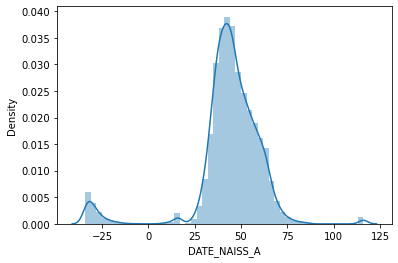

In [169]:
sns.distplot(AGE[AGE.notnull()])

In [167]:
AGE.value_counts()

 43    1496
 44    1335
 41    1330
 45    1325
 40    1314
       ... 
 8        2
-8        2
 15       1
 5        1
 18       1
Name: DATE_NAISS_A, Length: 109, dtype: Int64

Are there outliers for age?

- YES

Now compute year of cart creation and then seniority. Are there any outliers?

In [152]:
YEAR_CREATION = CUSTOMERS_INFO['DATE_CREATION_CARTE'].str.strip().str[-4:].astype(str).astype(int)

SENIORITY = YEAR_COLLECT - YEAR_CREATION

Identify potential inconsistencies and propose a way to correct them

## 4. Data preparation: cleaning and creation of indicators

#### Exercise 3: Data cleaning

Define and apply the rules needed to clean the data:
- format of columns,
- identify Gifts, separated from PLV,
- modalities grouping (see CENTRE_VILLE in the previous part),

For variables creation:
- how can total price be computed from given columns?

##### Data preparation of RECEIPTS_INFO

- Are there any columns we need to change the format for?
- How can we identify gifts? (We will specifically identify PLV ("Promotion en Lieu de Vente") and separate them from gifts.)
- What is a logical way to compute the final price of a row?
- Can we group modalities for `CENTRE_VILLE` (this new modality can be named "Shopping center" for instance, and the rest "City center")?
- Between `REGIONS_COMMERCIAL`, `REGIONS`, which one should be kept?


- Compute the age and replace < 15 and > 90 years old by null (done in exercise 4).
- Seniority > 10 replaced by null (done in exercise 4).

Most of the necessary modifications will need to be filled in in the code below.

RECEIPTS_INFO_OK = RECEIPTS_INFO.copy()

In [177]:
RECEIPTS_INFO_OK.head()

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT
0,2013-12-14,3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris,0
1,2013-12-14,3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris,1
2,2013-12-14,3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris,0
3,2013-12-14,3585211405099,4,0,81,"""SALE""",29,1,0,42,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre ville,Succursale,Paris,1
4,2013-12-14,7000000000096,4,0,81,"""SALE""",29,1,0,0,100,756,64576.0,7.0,15112.0,FAVO,2NDSG,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris,1


In [161]:
RECEIPTS_INFO_OK['DATE_ACHAT'] = RECEIPTS_INFO_OK['DATE_ACHAT'].str.replace('"', '')
RECEIPTS_INFO_OK['DATE_ACHAT'] = pd.to_datetime(RECEIPTS_INFO_OK['DATE_ACHAT'])

In [172]:
RECEIPTS_INFO_OK["TOP_GIFT"] = np.where(RECEIPTS_INFO_OK['PRIX_AP_REMISE'] == 0, 1, 0)

In [173]:
sum(RECEIPTS_INFO_OK["TOP_GIFT"])

58273

In [180]:
RECEIPTS_INFO_OK["TOP_PLV"] = np.where(RECEIPTS_INFO_OK['MODELE'] == 'PLV', 1, 0)

In [183]:
RECEIPTS_INFO_OK[RECEIPTS_INFO_OK['MODELE'] == 'PLV']

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV
1251,2016-07-06,3585211885228,131134,128611,81,"""SALE""",13,1,0,0,100,756,64563.0,10.0,15100.0,PLV,OPEB7,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris,1,1
2745,2016-07-06,3585211885228,172458,169456,81,"""SALE""",18,1,0,0,100,756,64563.0,10.0,15100.0,PLV,OPEB7,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris,1,1
2822,2016-06-13,3585211885228,174879,171969,81,"""SALE""",21,1,0,0,100,756,64563.0,10.0,15100.0,PLV,OPEB7,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris,1,1
3869,2016-07-02,3585211866869,214387,210884,81,"""SALE""",7,1,0,0,100,756,62489.0,10.0,13759.0,PLV,SVAL7,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris,1,1
4153,2016-08-06,3585211885228,233815,230228,81,"""SALE""",21,1,0,0,100,756,64563.0,10.0,15100.0,PLV,OPEB7,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330693,2016-03-02,3585211866869,127993,125366,81,"""SALE""",1,1,0,0,0,343,62489.0,10.0,13759.0,PLV,SVAL7,13.0,1.0,5.0,NaN,NaN,Province,Centre Commercial,Succursale,Province,1,1
330939,2016-07-06,3585211885228,233751,229907,81,"""SALE""",8,1,0,0,100,343,64563.0,10.0,15100.0,PLV,OPEB7,13.0,1.0,5.0,NaN,NaN,Province,Centre Commercial,Succursale,Province,1,1
331291,2016-06-16,3585211885228,234924,230942,81,"""SALE""",11,1,0,0,100,891,64563.0,10.0,15100.0,PLV,OPEB7,13.0,1.0,5.0,NaN,NaN,Province,Centre ville,Affilié,Province,1,1
331304,2016-06-16,3585211885228,234924,230942,81,"""SALE""",11,1,0,0,100,891,64563.0,10.0,15100.0,PLV,OPEB7,13.0,1.0,5.0,NaN,NaN,Province,Centre ville,Affilié,Province,1,1


In [250]:
RECEIPTS_INFO_OK["TOT_PRICE"] = RECEIPTS_INFO_OK["QUANTITE"]*RECEIPTS_INFO_OK["PRIX_AP_REMISE"]

In [251]:
RECEIPTS_INFO_OK.head(20)

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE,TOT_PRICE
0,2013-12-14,3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,28,28
1,2013-12-14,3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,1,0,0,0
2,2013-12-14,3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,23,23
3,2013-12-14,3585211405099,4,0,81,"""SALE""",29,1,0,42,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,1,0,0,0
4,2013-12-14,7000000000096,4,0,81,"""SALE""",29,1,0,0,100,756,64576.0,7.0,15112.0,FAVO,2NDSG,13.0,1.0,5.0,NaN,NaN,Paris,City center,Succursale,Paris,1,0,0,0
5,2013-12-14,3585211302688,4,0,81,"""SALE""",29,1,59,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,59,59
6,2012-11-14,3585211093364,491,0,81,"""SALE""",1,1,38,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,38,38
7,2012-11-14,3585211108983,491,0,81,"""SALE""",1,1,23,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,23,23
8,2012-11-14,3585211117428,491,0,81,"""SALE""",1,1,28,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,28,28
9,2012-11-14,3585211112614,491,0,81,"""SALE""",1,1,36,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,36,36


Can we group modalities for `CENTRE_VILLE` (this new modality can be named "Shopping center" for instance, and the rest "City center")?

In [252]:
RECEIPTS_INFO_OK["CENTRE_VILLE"] = np.where(RECEIPTS_INFO_OK['CENTRE_VILLE'] == 'Centre ville', 'City center', 'Shopping center')

In [253]:
RECEIPTS_INFO_OK['CENTRE_VILLE'].unique()

array(['Shopping center'], dtype=object)

##### Data preparation of CUSTOMERS_INFO

In [254]:
CUSTOMERS_INFO_OK = CUSTOMERS_INFO.copy()

In [255]:
CUSTOMERS_INFO_OK.head()

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE,MANAGING_STORE
0,4,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989,751
1,27,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007,942
2,34,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007,942
3,37,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007,942
4,47,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008,941


#### Exercise 4: Indicators calculation 

Scope: on the last 12 months available

In [256]:
RECEIPTS_INFO_OK["DATE_ACHAT"].min()

Timestamp('2012-01-09 00:00:00')

In [257]:
from dateutil.relativedelta import relativedelta
DATE_MAX = RECEIPTS_INFO_OK["DATE_ACHAT"].max()

In [258]:
min_date_RFM = DATE_MAX - relativedelta(months = 12)
max_date_RFM = RECEIPTS_INFO_OK["DATE_ACHAT"].max()

Reduce perimeter of observed data with computed quantities.

In [259]:
RECEIPTS_INFO_RFM = RECEIPTS_INFO_OK[RECEIPTS_INFO_OK["DATE_ACHAT"] >= min_date_RFM]

In [260]:
RECEIPTS_INFO_RFM.DATE_ACHAT.min()

Timestamp('2015-12-08 00:00:00')

In [261]:
RECEIPTS_INFO_RFM.DATE_ACHAT.max()

Timestamp('2016-12-08 00:00:00')

In [262]:
RECEIPTS_INFO_RFM.shape

(90566, 30)

In [263]:
RECEIPTS_INFO_RFM

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,Ligne,Famille,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE,TOT_PRICE
54,2015-12-21,3585211805486,8918,7599,81,"""SALE""",20,1,0,0,100,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Shopping center,Succursale,Paris,1,0,0,0
59,2015-12-21,3585211545856,8918,7599,81,"""SALE""",20,1,15,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Shopping center,Succursale,Paris,0,0,15,15
81,2015-12-21,3585211543098,8918,7599,81,"""SALE""",20,1,42,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Shopping center,Succursale,Paris,0,0,42,42
201,2016-11-01,3585211712142,57323,55236,81,"""SALE""",57,1,31,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Shopping center,Succursale,Paris,0,0,31,31
202,2016-11-01,3585211711022,57323,55236,81,"""SALE""",57,1,24,0,0,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Shopping center,Succursale,Paris,0,0,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332726,2016-08-31,3585211546259,240205,236167,81,"""SALE""",4,1,17,0,0,871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Shopping center,Succursale,Province,0,0,17,17
332727,2016-08-31,3585211862724,240205,236167,81,"""SALE""",4,1,45,0,0,871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Shopping center,Succursale,Province,0,0,45,45
332728,2016-08-31,3585211132407,240205,236167,81,"""SALE""",4,1,47,0,0,871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Shopping center,Succursale,Province,0,0,47,47
332729,2016-08-31,3585211862793,240205,236167,81,"""SALE""",4,1,27,0,0,871,64640.0,90.0,15152.0,120,VOLUB,6100.0,3.0,3.0,Corseterie,Slip,Province,Shopping center,Succursale,Province,0,0,27,27


##### Compute MONETARY VALUE per visit and the average price:

First compute total price and total quantity per visit, with help from what you found at the beginning of part 3.

In [264]:
VISIT_VALUE = RECEIPTS_INFO_RFM.groupby(['ID_INDIVIDU', 'NUM_TICKET', 'CODE_BOUTIQUE', 'DATE_ACHAT']).agg('sum')

In [265]:
VISIT_VALUE

ID_FOYER  CODE_LIGNE  \
ID_INDIVIDU NUM_TICKET CODE_BOUTIQUE DATE_ACHAT                         
4           7          930           2016-07-23    351796         162   
            10         730           2015-12-14    175898          81   
            25         753           2016-07-20    703592         324   
            513        920           2016-02-07    175898          81   
            536        920           2016-06-07    351796         162   
...                                                   ...         ...   
240219      6          642           2016-08-31   1181440         405   
240221      7          642           2016-08-31   1181430         405   
240269      5          642           2016-08-31   1889976         648   
240290      4          491           2016-08-31   1181320         405   
240296      11         541           2016-08-31   1890160         648   

                                                 QUANTITE  PRIX_AP_REMISE  \
ID_INDIVIDU NUM_TICKET CODE_BOUTIQUE DATE_ACHAT                             
4           7          930           2016-07-23         2              89   
            10         730           2015-12-14         1              69   
            25         753           2016-07-20         4             124   
            513        920           2016-02-07         1              75   
            536        920           2016-06-07         2              65   
...                                                   ...             ...   
240219      6          642           2016-08-31         5             138   
240221      7          642           2016-08-31         5             142   
240269      5          642           2016-08-31         8             245   
240290      4          491           2016-08-31         5              81   
240296      11         541           2016-08-31         8             239   

                                                 REMISE  REMISE_VALEUR  \
ID_INDIVIDU NUM_TICKET CODE_BOUTIQUE DATE_ACHAT                          
4           7          930           2016-07-23       0              0   
            10         730           2015-12-14       0              0   
            25         753           2016-07-20       0              0   
            513        920           2016-02-07       0              0   
            536        920           2016-06-07       0              0   
...                                                 ...            ...   
240219      6          642           2016-08-31       0            100   
240221      7          642           2016-08-31       0            100   
240269      5          642           2016-08-31       0            100   
240290      4          491           2016-08-31       0            100   
240296      11         541           2016-08-31       0            100   

                                                 ID_ARTICLE  ID_MODELE  \
ID_INDIVIDU NUM_TICKET CODE_BOUTIQUE DATE_ACHAT                          
4           7          930           2016-07-23         0.0        0.0   
            10         730           2015-12-14         0.0        0.0   
            25         753           2016-07-20         0.0        0.0   
            513        920           2016-02-07         0.0        0.0   
            536        920           2016-06-07         0.0        0.0   
...                                                     ...        ...   
240219      6          642           2016-08-31     60936.0        7.0   
240221      7          642           2016-08-31     60936.0        7.0   
240269      5          642           2016-08-31    125586.0       28.0   
240290      4          491           2016-08-31     60936.0        7.0   
240296      11         541           2016-08-31     60936.0        7.0   

                                                 ID_OPTION  COLORIS  POSITION  \
ID_INDIVIDU NUM_TICKET CODE_BOUTIQUE DATE_ACHAT                                 
4        

Instruction below can help with columns renaming.

In [266]:
VISIT_VALUE.columns

Index(['ID_FOYER', 'CODE_LIGNE', 'QUANTITE', 'PRIX_AP_REMISE', 'REMISE',
       'REMISE_VALEUR', 'ID_ARTICLE', 'ID_MODELE', 'ID_OPTION', 'COLORIS',
       'POSITION', 'GRILLE', 'TOP_GIFT', 'TOP_PLV', 'PRICE', 'TOT_PRICE'],
      dtype='object')

Compute average price from computed agregates.

In [267]:
VISIT_VALUE["AVG_PRICE"] = VISIT_VALUE["PRIX_AP_REMISE"]/VISIT_VALUE["QUANTITE"]

In [268]:
VISIT_VALUE = VISIT_VALUE.reset_index()

In [269]:
VISIT_VALUE.head(10)

,ID_INDIVIDU,NUM_TICKET,CODE_BOUTIQUE,DATE_ACHAT,ID_FOYER,CODE_LIGNE,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,ID_ARTICLE,ID_MODELE,ID_OPTION,COLORIS,POSITION,GRILLE,TOP_GIFT,TOP_PLV,PRICE,TOT_PRICE,AVG_PRICE
0,4,7,930,2016-07-23,351796,162,2,89,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,89,89,44.500000
1,4,10,730,2015-12-14,175898,81,1,69,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,69,69,69.000000
2,4,25,753,2016-07-20,703592,324,4,124,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,124,124,31.000000
3,4,513,920,2016-02-07,175898,81,1,75,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,75,75,75.000000
4,4,536,920,2016-06-07,351796,162,2,65,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,65,65,32.500000
5,4,545,920,2016-06-21,527694,243,3,53,13,140,64573.0,7.0,15109.0,13.0,1.0,5.0,1,0,53,53,17.666667
6,91,13,312,2016-10-04,280575,243,3,112,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,112,112,37.333333
7,99,3,313,2016-12-01,191194,162,2,57,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,57,57,28.500000
8,99,4,313,2016-05-22,286791,243,3,94,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,94,94,31.333333
9,99,6,313,2016-05-28,191194,162,2,26,0,100,0.0,0.0,0.0,0.0,0.0,0.0,1,0,26,26,13.000000


##### Calculate FREQUENCY per individual (from the precedent table per visit):

In addition to frequency, compute average of monetary value per visit, sum of monetary value per visit, and average of quantities

In [270]:
FREQUENCY = VISIT_VALUE.groupby(['ID_INDIVIDU']).size()

In [281]:
FREQUENCY = pd.DataFrame(FREQUENCY).reset_index()

In [286]:
FREQUENCY = FREQUENCY.rename(columns={0: 'NB_VISITS'})

In [275]:
AVG_QUANT = VISIT_VALUE.groupby(['ID_INDIVIDU']).QUANTITE.agg('mean')

In [280]:
AVG_QUANT = pd.DataFrame(AVG_QUANT).reset_index()

,ID_INDIVIDU,QUANTITE
0,4,2.166667
1,91,3.000000
2,99,2.333333
3,557,2.400000
4,1396,5.000000
...,...,...
10880,240219,5.000000
10881,240221,5.000000
10882,240269,8.000000
10883,240290,5.000000


In [288]:
VISIT_VALUE = VISIT_VALUE.merge(FREQUENCY, left_on='ID_INDIVIDU', right_on='ID_INDIVIDU')

,ID_INDIVIDU,NUM_TICKET,CODE_BOUTIQUE,DATE_ACHAT,ID_FOYER,CODE_LIGNE,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,ID_ARTICLE,ID_MODELE,ID_OPTION,COLORIS,POSITION,GRILLE,TOP_GIFT,TOP_PLV,PRICE,TOT_PRICE,AVG_PRICE,NB_VISITS_x,NB_VISITS_y
0,4,7,930,2016-07-23,351796,162,2,89,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,89,89,44.500,6,6
1,4,10,730,2015-12-14,175898,81,1,69,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,69,69,69.000,6,6
2,4,25,753,2016-07-20,703592,324,4,124,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,124,124,31.000,6,6
3,4,513,920,2016-02-07,175898,81,1,75,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,75,75,75.000,6,6
4,4,536,920,2016-06-07,351796,162,2,65,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,65,65,32.500,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23707,240219,6,642,2016-08-31,1181440,405,5,138,0,100,60936.0,7.0,12742.0,13.0,1.0,5.0,1,0,138,138,27.600,1,1
23708,240221,7,642,2016-08-31,1181430,405,5,142,0,100,60936.0,7.0,12742.0,13.0,1.0,5.0,1,0,142,142,28.400,1,1
23709,240269,5,642,2016-08-31,1889976,648,8,245,0,100,125586.0,28.0,27904.0,6113.0,3.0,15.0,1,0,245,245,30.625,1,1
23710,240290,4,491,2016-08-31,1181320,405,5,81,0,100,60936.0,7.0,12742.0,13.0,1.0,5.0,1,0,81,81,16.200,1,1


In [289]:
VISIT_VALUE = VISIT_VALUE.merge(AVG_QUANT, left_on='ID_INDIVIDU', right_on='ID_INDIVIDU')

In [291]:
VISIT_VALUE.head(10)

,ID_INDIVIDU,NUM_TICKET,CODE_BOUTIQUE,DATE_ACHAT,ID_FOYER,CODE_LIGNE,QUANTITE_x,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,ID_ARTICLE,ID_MODELE,ID_OPTION,COLORIS,POSITION,GRILLE,TOP_GIFT,TOP_PLV,PRICE,TOT_PRICE,AVG_PRICE,NB_VISITS_x,NB_VISITS_y,QUANTITE_y
0,4,7,930,2016-07-23,351796,162,2,89,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,89,89,44.500000,6,6,2.166667
1,4,10,730,2015-12-14,175898,81,1,69,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,69,69,69.000000,6,6,2.166667
2,4,25,753,2016-07-20,703592,324,4,124,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,124,124,31.000000,6,6,2.166667
3,4,513,920,2016-02-07,175898,81,1,75,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,75,75,75.000000,6,6,2.166667
4,4,536,920,2016-06-07,351796,162,2,65,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,65,65,32.500000,6,6,2.166667
5,4,545,920,2016-06-21,527694,243,3,53,13,140,64573.0,7.0,15109.0,13.0,1.0,5.0,1,0,53,53,17.666667,6,6,2.166667
6,91,13,312,2016-10-04,280575,243,3,112,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,112,112,37.333333,1,1,3.000000
7,99,3,313,2016-12-01,191194,162,2,57,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,57,57,28.500000,3,3,2.333333
8,99,4,313,2016-05-22,286791,243,3,94,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,94,94,31.333333,3,3,2.333333
9,99,6,313,2016-05-28,191194,162,2,26,0,100,0.0,0.0,0.0,0.0,0.0,0.0,1,0,26,26,13.000000,3,3,2.333333


##### Calculate RECENCY per individual:

First compute last date of purchase.

In [ ]:
RECENCY = 

In [ ]:
RECENCY.head()

Convert it to datetime.

In [ ]:
RECENCY["DATE_ACHAT"] = 

In [ ]:
max_date_RFM = 

Recency can now be computed:

In [ ]:
RECENCY["RECENCY"] = 

In [ ]:
RECENCY.head()

##### Diversification in terms of stores, lines and families

You can now count distinct number of stores, lines and families for each individual.
For stores, PLV should be excluded.
For lines and families, PLV, FAVO and FAVORI should be excluded.

In [ ]:
DIVERS_STORE = 

In [ ]:
DIVERS_LINE = 

In [ ]:
DIVERS_FAM = 

##### Number of gifts per individual

In [ ]:
NB_GIFTS = 

##### Share of visits in the managing store

Use VISIT_VALUE and customers information.

In [ ]:
MANAGING_STORE = 

In [ ]:
MANAGING_STORE["TOP_MANAGING_STORE"] = 

In [ ]:
MANAGING_STORE.tail()

In [ ]:
SHARE_MANAGING_STORE = 

Surprising to have customers with 0% of their visits in their managing store during the last year... 

In [ ]:
MANAGING_STORE[MANAGING_STORE.ID_INDIVIDU == 99]

##### Age and seniority

In [ ]:
CUSTOMERS_INFO_OK["BIRTH_YEAR"] = 
CUSTOMERS_INFO_OK["BIRTH_MONTH"] = 
CUSTOMERS_INFO_OK["BIRTH_DAY"] = 

With year, month and day, you can now create a date in the right pandas type:

In [ ]:
CUSTOMERS_INFO_OK["BIRTH_DATE"] = 

Create the age column:

In [ ]:
CUSTOMERS_INFO_OK["AGE"] = 

Create missing values when age < 15 or age > 90:

In [ ]:
CUSTOMERS_INFO_OK["AGE"] = 

Create the seniority column:

In [ ]:
# Seniority in months
CUSTOMERS_INFO_OK["SENIORITY"] = 

Create missing values when seniority is bigger than 10 years, and clip negative values to 0:

In [ ]:
CUSTOMERS_INFO_OK["SENIORITY"] = 

In [ ]:
CUSTOMERS_INFO_OK.head()

##### Gather all features in a MASTER table (at the individual level):

In [ ]:
MASTER = 

In [ ]:
MASTER.head()

A lot of customers have missing values concerning the purchase features. Check that they are indeed not present in the receipts table from the beginning:

In [ ]:
RECEIPTS_INFO[RECEIPTS_INFO.ID_INDIVIDU==37]

Indeed, these customers have no receipts so we are not going to consider them in the RFM segmentation. They can be prospects, inactive customers (last purchase <1 year) or very recent customer (last purchase > 30/11/2016).

For the RFM segmentation we exclude inactive customers on the year of study.

In [ ]:
MASTER_RFM = 

In [ ]:
MASTER_RFM.head()

In [ ]:
len(MASTER_RFM)

Fill missing values with 0 for adequate columns:

## 5. Creation of the "RFM" segmentation

### Distribution of Monetary value

Use `describe` and `distplot`.

We have customers with a 0 cumulative value. Let's look at them.

In [ ]:
RECEIPTS_INFO_OK[RECEIPTS_INFO_OK.ID_INDIVIDU == ___]

This customer came only for ...

In [ ]:
len(MASTER_RFM[MASTER_RFM.CUMUL_VALUE == 0])

Few customers are concerned. We drop them of the MASTER_RFM table.

In [ ]:
MASTER_RFM =

In [ ]:
len(MASTER_RFM)

### Distribution of Frequency

### Distribution of Recency

In [ ]:
# New customer if seniority <= 1 year
MASTER_RFM["TOP_NEW"] = 

In [ ]:
# Number of new customers

## Determine thresholds in order to split them in low/medium/high groups

In [ ]:
MASTER_RFM.head()

So we can propose the following thresholds:

MONETARY VALUE:
- low if less than x€ 
- medium if between x€ and x€
- high if more than x€

FREQUENCY:
- low if x visit on the period
- medium if x visits on the period
- high if x visits or more on the period

RECENCY: 
- low if last purchase more than x months ago (x days)
- medium if last purchase between x and x months ago
- high if last purchase less than x months ago (x days)

In [ ]:
min_recency = 
max_recency = 
min_frequency = 
max_frequency = 
min_money = 
max_money = 

Create high med low levels according to thresholds:

In [ ]:
MASTER_RFM["RECENCY_level"] = 

In [ ]:
MASTER_RFM["FREQUENCY_level"] = 

In [ ]:
MASTER_RFM["MONEY_level"] = 

Check that the Low/Medium/High classes are quite well balanced. If not, try to change the thresholds.

Create FM segmentation based on splits seen in class:

In [ ]:
cond_LowFM = 
cond_MediumFM = 
cond_HighFM = 

Based on the 3 conditions and on the new customers, create F X M segmentation:

In [ ]:
MASTER_RFM["FM_SEG"] = 

Create complete RFM segmentation based on definition seen in class:

In [ ]:
cond_Top = 
cond_Good = 
cond_Decel = 
cond_Small = 
cond_Weak = 

In [ ]:
MASTER_RFM["RFM_SEG"] = 

## 6. Main insights

To do for the project

## 7. Migration across time

To do for the project